In [611]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.spatial import distance

In [612]:
df = pd.read_csv('iris2.csv')

In [613]:
x_train = df.loc[:, df.columns != 'variety'].to_numpy()
x_train[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [614]:
y_test = df['variety'].to_numpy()
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

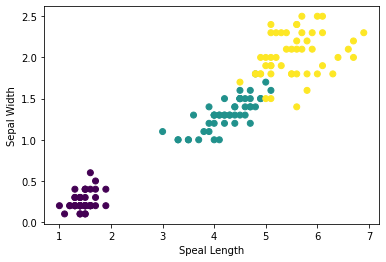

In [615]:
plt.scatter(x_train[:, 2], x_train[:, 3], c=y_test)
plt.xlabel('Speal Length')
plt.ylabel('Sepal Width')
plt.show()

In [616]:
from sklearn.cluster import KMeans

In [617]:
model = KMeans(n_clusters=3, max_iter=200, tol=.01)

In [618]:
y_hat = model.fit_predict(x_train)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [619]:
def compare(arr1: np.array, arr2: np.array, method : str = None) -> None:
    count = 0
    l = len(arr1)
    for i in range(l):
        if arr1[i] == arr2[i]:
            count += 1
    print(f'Accuracy {round(count/l, 3)}; Method: {method}')

In [620]:
centers = model.cluster_centers_.tolist()
centers.sort()
centers = np.array(centers)
centers

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [621]:
def dist(v1, v2):
    return distance.euclidean(v1, v2)

In [622]:
def get_iris_cluster(arr: np.array, centers: np.array):
    dists = [dist(arr, centers[i]) for i in range(3)]
    return dists.index(min(dists)) 

In [623]:
y_res = np.array([get_iris_cluster(x, centers) for x in x_train])

In [624]:
y_res

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Accuracy 0.893; Method: KMeans


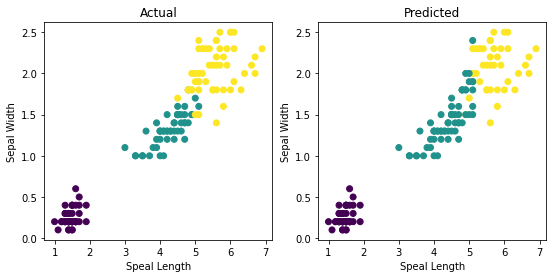

In [625]:
fig, (actual, predict) = plt.subplots(1, 2, figsize=(9,4))

actual.scatter(x_train[:, 2], x_train[:, 3], c=y_test)
actual.set_xlabel('Speal Length')
actual.set_ylabel('Sepal Width')
actual.set_title('Actual')

predict.scatter(x_train[:, 2], x_train[:, 3], c=y_hat)
predict.set_xlabel('Speal Length')
predict.set_ylabel('Sepal Width')
predict.set_title('Predicted')

compare(y_res, y_test, 'KMeans')
plt.show()

In [626]:
from sklearn.manifold import TSNE